# Heart Disease Analysis

In [2]:
# Importing Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
# Read the CSV file

df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [4]:
df.tail()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No

In [5]:
df.shape

(319795, 18)

In [9]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

__Column Descriptions__

- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 cigarettes in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- `MentalHealth`: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: Fourteen-level age category. (then calculated the mean)
- `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- `GenHealth`: Would you say that in general your health is...
- `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`: (Ever told) (you had) skin cancer?

**Categorical Features:**

`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `PhysicalActivity`, `Asthma`, `KidneyDisease`, `SkinCancer`

**Continuous Features:**

`BMI`

**Discrete Features:**

`Race`,`Diabetic`,`GenHealth`,`PhysicalHealtH`, `MentalHealth`, `AgeCategory`, `SleepTime`

## Numerical Data Stats:

In [15]:
# AgeCategory shold not be categorical, So we'll encode it to Numerical Data
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])


df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

##  Data Cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

_The output shows that we have around 319795 entries with 18 columns. No null values, and we have 13 categorical features, and 5 numerical features._

In [17]:
# Now, we need to see the unique value of each features, most of features are binary data, discrete data and one feature is continous data (BMI)
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
[57 80 67 77 42 72 62 52 47 21 37 32 27] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 

KidneyDisease
['No' 'Yes'] 

SkinCancer
['Yes' 'No'] 



## Data Visualization..

Data Visualization divided into three kind of visualization:
* Binary
* Discrete
* Continuous

In [18]:
# Take out all features of binary data (Yes, No) and (Male, Female)
binary_feat = []

for feature in df.columns:
    if np.isin(df[feature].unique(),["Yes","No"]).all() or np.isin(df[feature].unique(),["Male","Female"]).all():
        binary_feat.append(feature)

C:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [19]:
# Take out feature of continuous data 
continuous_feat = ["BMI"]

In [68]:
# Take out all features of discrete data
features = df.columns
discrete_feat = features[~features.isin(binary_feat+continuous_feat)]

### *Binary Data*

For binary data, I choose the pie chart because it has only two categories and I wanna explore the people who have heart disease and who not have heart disease..

In [27]:
df[binary_feat].head()

HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0           No     Yes              No     No          No  Female   
1           No      No              No    Yes          No  Female   
2           No     Yes              No     No          No    Male   
3           No      No              No     No          No  Female   
4           No      No              No     No         Yes  Female   

  PhysicalActivity Asthma KidneyDisease SkinCancer  
0              Yes    Yes            No        Yes  
1              Yes     No            No         No  
2              Yes    Yes            No         No  
3               No     No            No        Yes  
4              Yes     No            No         No

In [35]:
# Create a function to visualize the pie chart
def pie_chart(feat_name):
    fig, axes = plt.subplots(1,2,figsize=(15,8))
    labels = df[feat_name].unique()
    textprops = {"fontsize":15}
    
    axes[0].pie(df[df.HeartDisease=="No"][feat_name].value_counts(),labels=labels, autopct='%1.1f%%')
    axes[0].set_title('No Heart Disease',fontsize=15)
    
    axes[1].pie(df[df.HeartDisease=="Yes"][feat_name].value_counts(),labels=labels, autopct='%1.1f%%')
    axes[1].set_title('Heart Disease', fontsize=15)
    
    plt.legend(title=feat_name,fontsize=15,title_fontsize=15)
    plt.show()

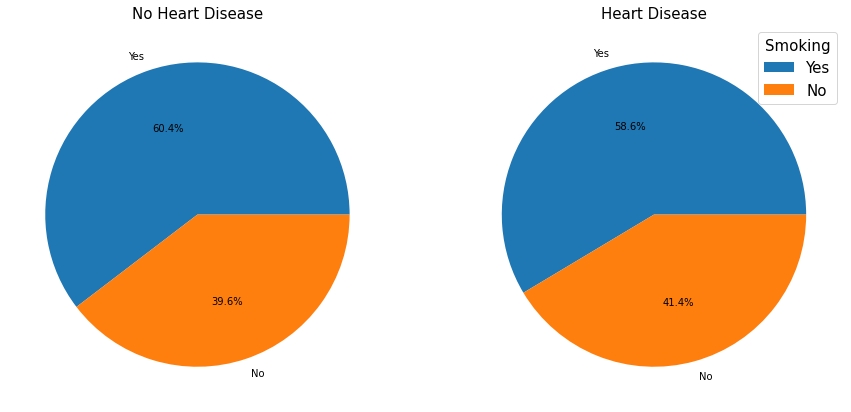

In [36]:
pie_chart('Smoking')

_In these two pie chart, the ratio between who have Smoking and who not Smoking in Heart Disease and No Heart Disease is the same. Most people who at least smoking 100 cigarettes still not get Heart Disease but also, people have Heart Disease also smoking 100 cigarettes. So does this mean the Smoking not affect to Heart Disease or there are something different in people smoking between two piechart._

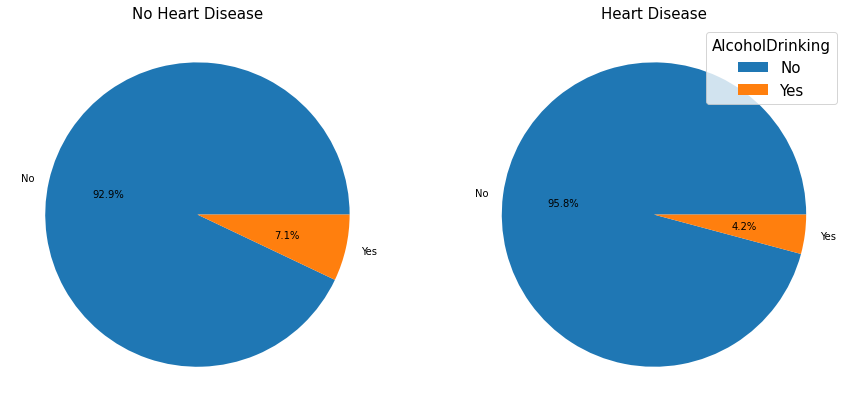

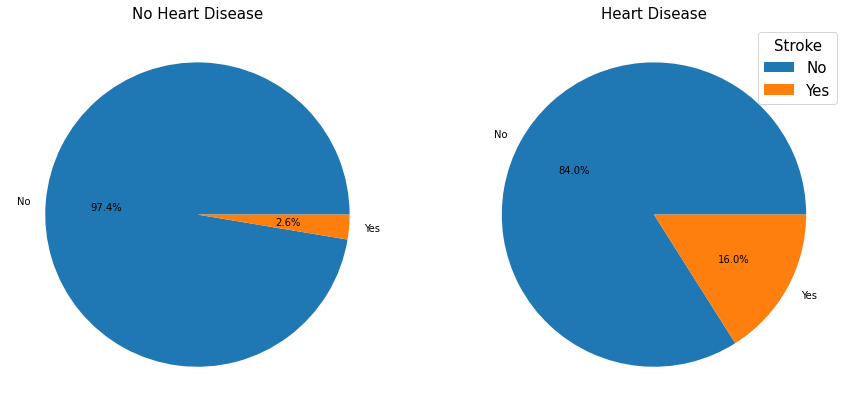

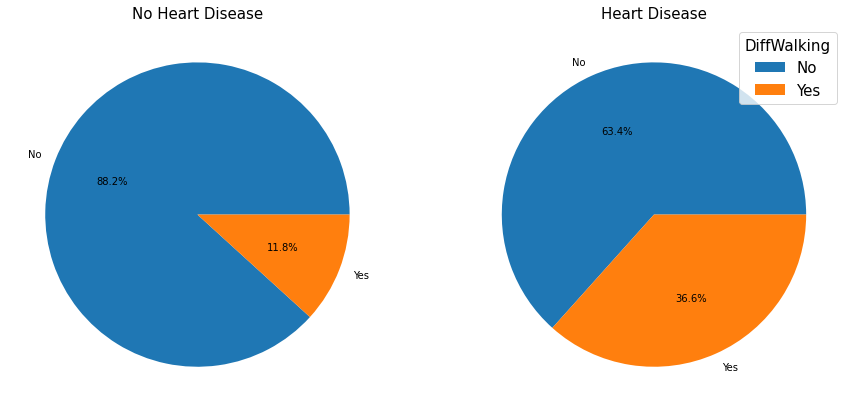

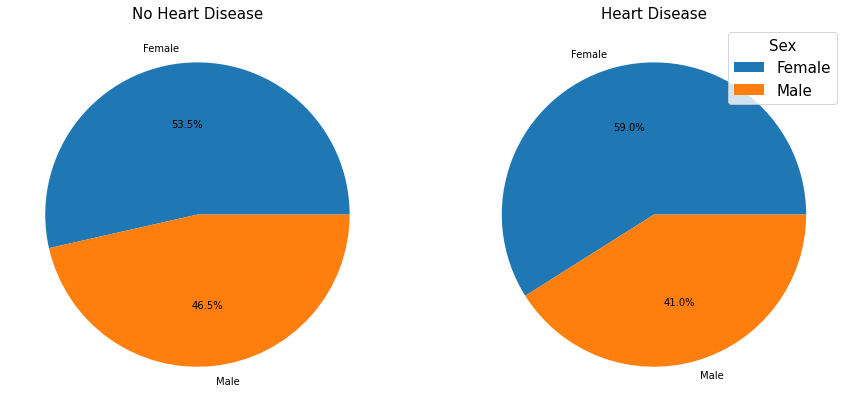

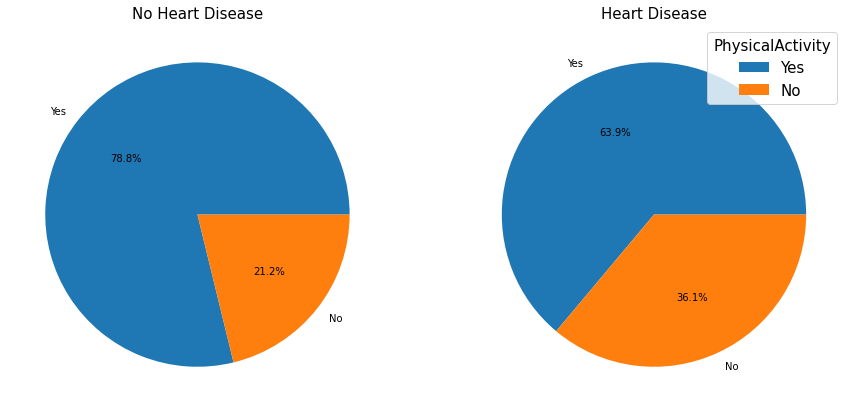

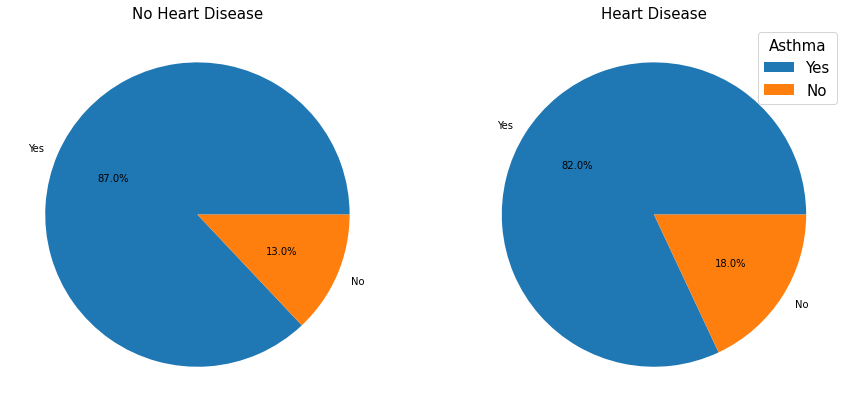

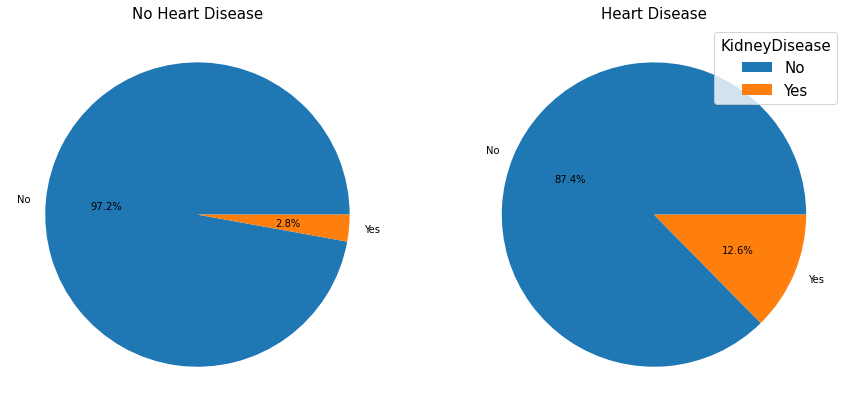

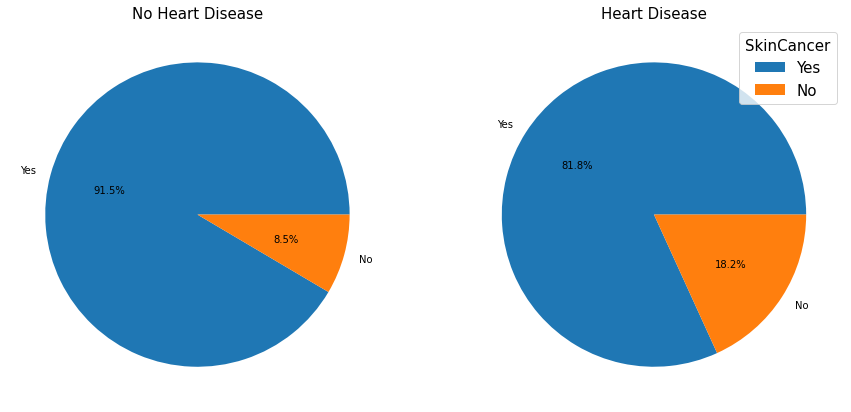

In [37]:
for feature in binary_feat[2:]:
    pie_chart(feature)

_After visualize Pie Chart, we can see features like Stroke, DiffWalking, Physical Activity Kidney Disease and Skin Cancer affect most people who have Heart Disease than people who don't have Heart Disease. We can clearly see the distinguish ratio between two pie chart in these features. For example in Stroke Pie Charts we see 16% people who have Heart Disease (Ever told)(had) a stroke meanwhile the number in who don't have Heart Disease kind of small, only 2.6%. This is very helpful feature when we want to predict Heart Disease or Not_.

### *Discrete Data*

In [69]:
df[discrete_feat].head()

PhysicalHealth  MentalHealth  AgeCategory   Race Diabetic  GenHealth  \
0             3.0          30.0           57  White      Yes  Very good   
1             0.0           0.0           80  White       No  Very good   
2            20.0          30.0           67  White      Yes       Fair   
3             0.0           0.0           77  White       No       Good   
4            28.0           0.0           42  White       No  Very good   

   SleepTime  
0        5.0  
1        7.0  
2        8.0  
3        6.0  
4        8.0

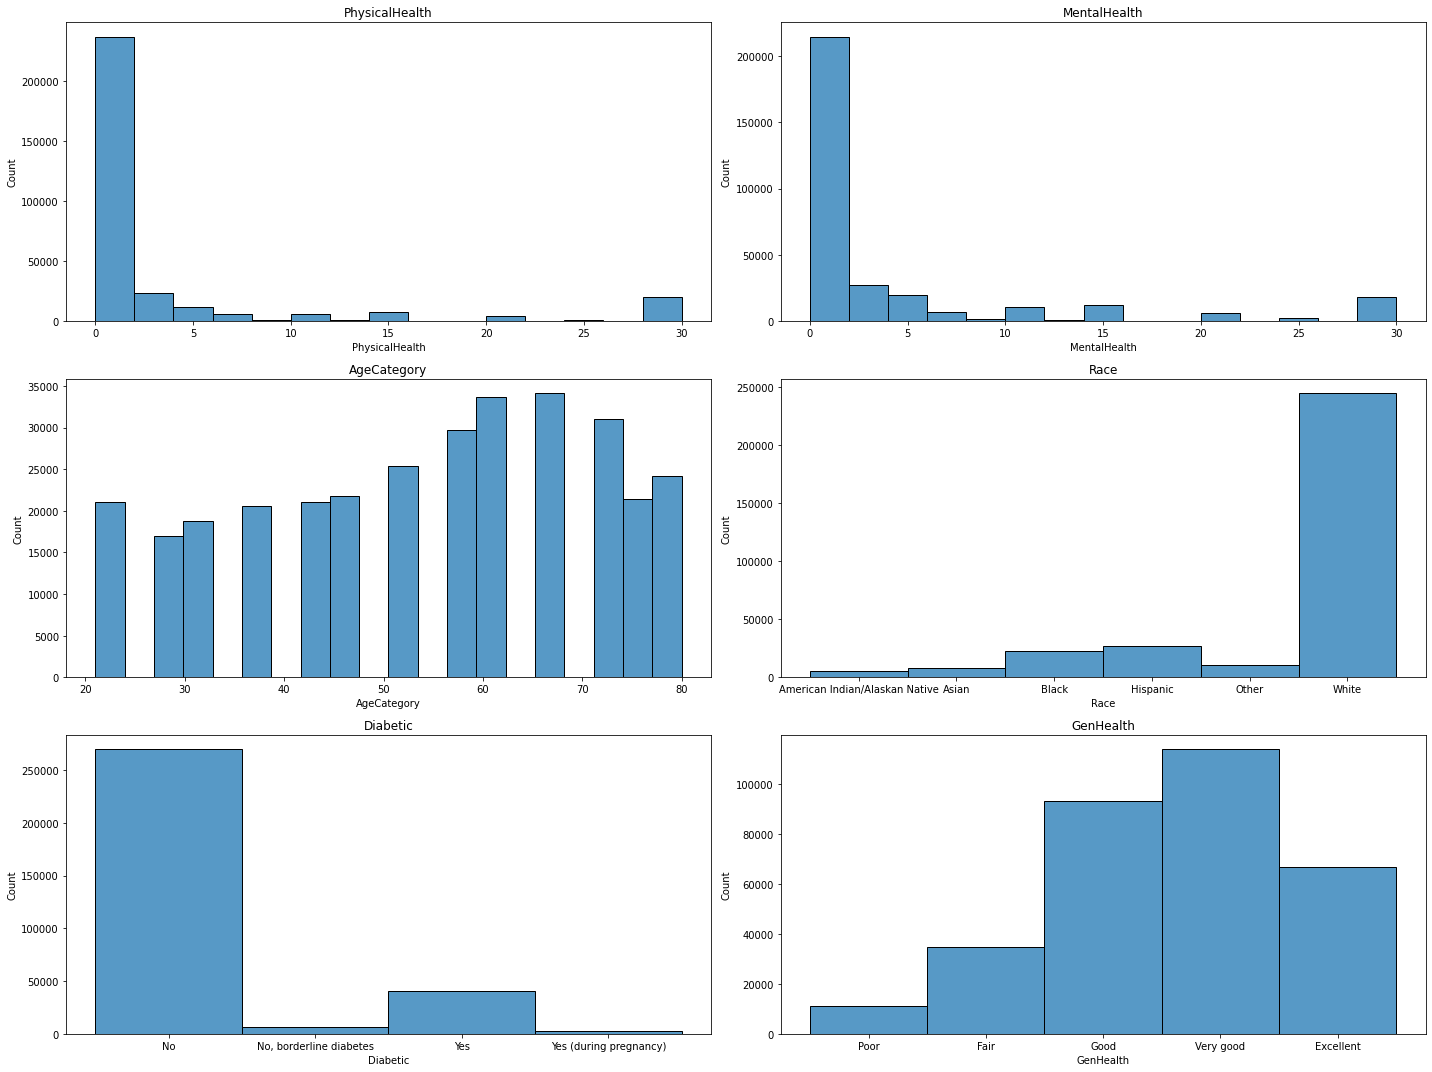

In [82]:
position_index = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
fig,axes = plt.subplots(3,2,figsize=(20,15))
for position, feature in zip(position_index, discrete_feat):
    if len(df[feature].unique()) > 15:
        sns.histplot(ax=axes[position],bins = 15, data=df[feature].sort_values())
        
    elif feature in ["AgeCategory"]:
            sns.histplot(ax=axes[position], bins = 20, data=df[feature].sort_values())
        
    elif feature in ["Race"]:
            sns.histplot(ax=axes[position],bins = 15, data=df[feature].sort_values())

    elif feature == "GenHealth":
            sns.histplot(ax=axes[position],data=pd.Categorical(df.GenHealth, categories=["Poor","Fair","Good","Very good","Excellent"], ordered=True))
            axes[position].set(xlabel=feature)
    else:
            sns.histplot(ax=axes[position],data=df[feature].sort_values())
    axes[position].set_title(feature)
        
fig.tight_layout()
plt.show()


### *Continuous Data*

- Visualization of Continuous Data

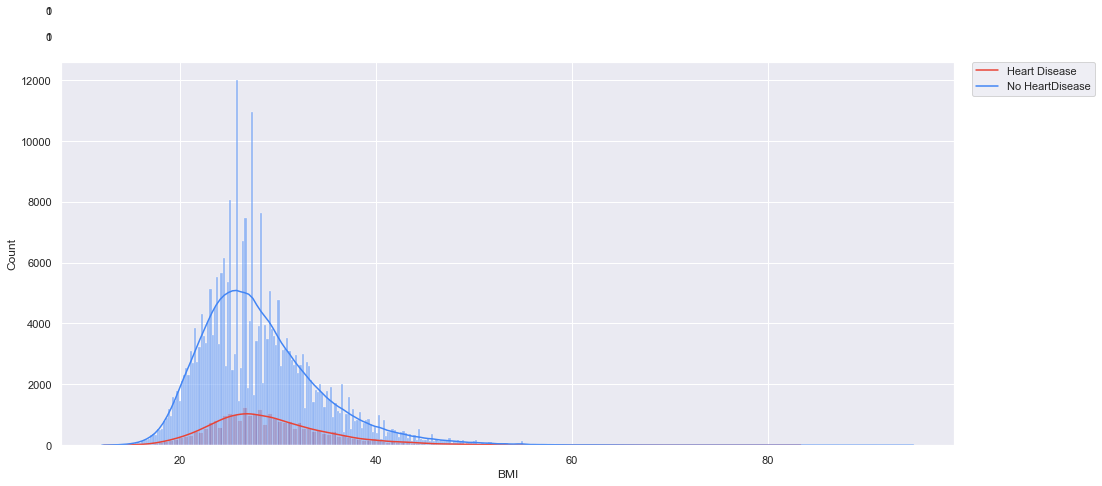

In [96]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0, 0, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
#sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

#sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
#ax_hist.set(title="BMI")

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

In [59]:
def draw_density_plot(name_feature):
    fig,axes = plt.subplots(figsize=(15,8))
    sns.kdeplot(ax=axes,data=df,x=continuous_feat[0],hue=name_feature,fill = True, bw_adjust=.8)
    plt.show()

In [63]:
features = df.columns
combine_feat = features[~features.isin(continuous_feat)]

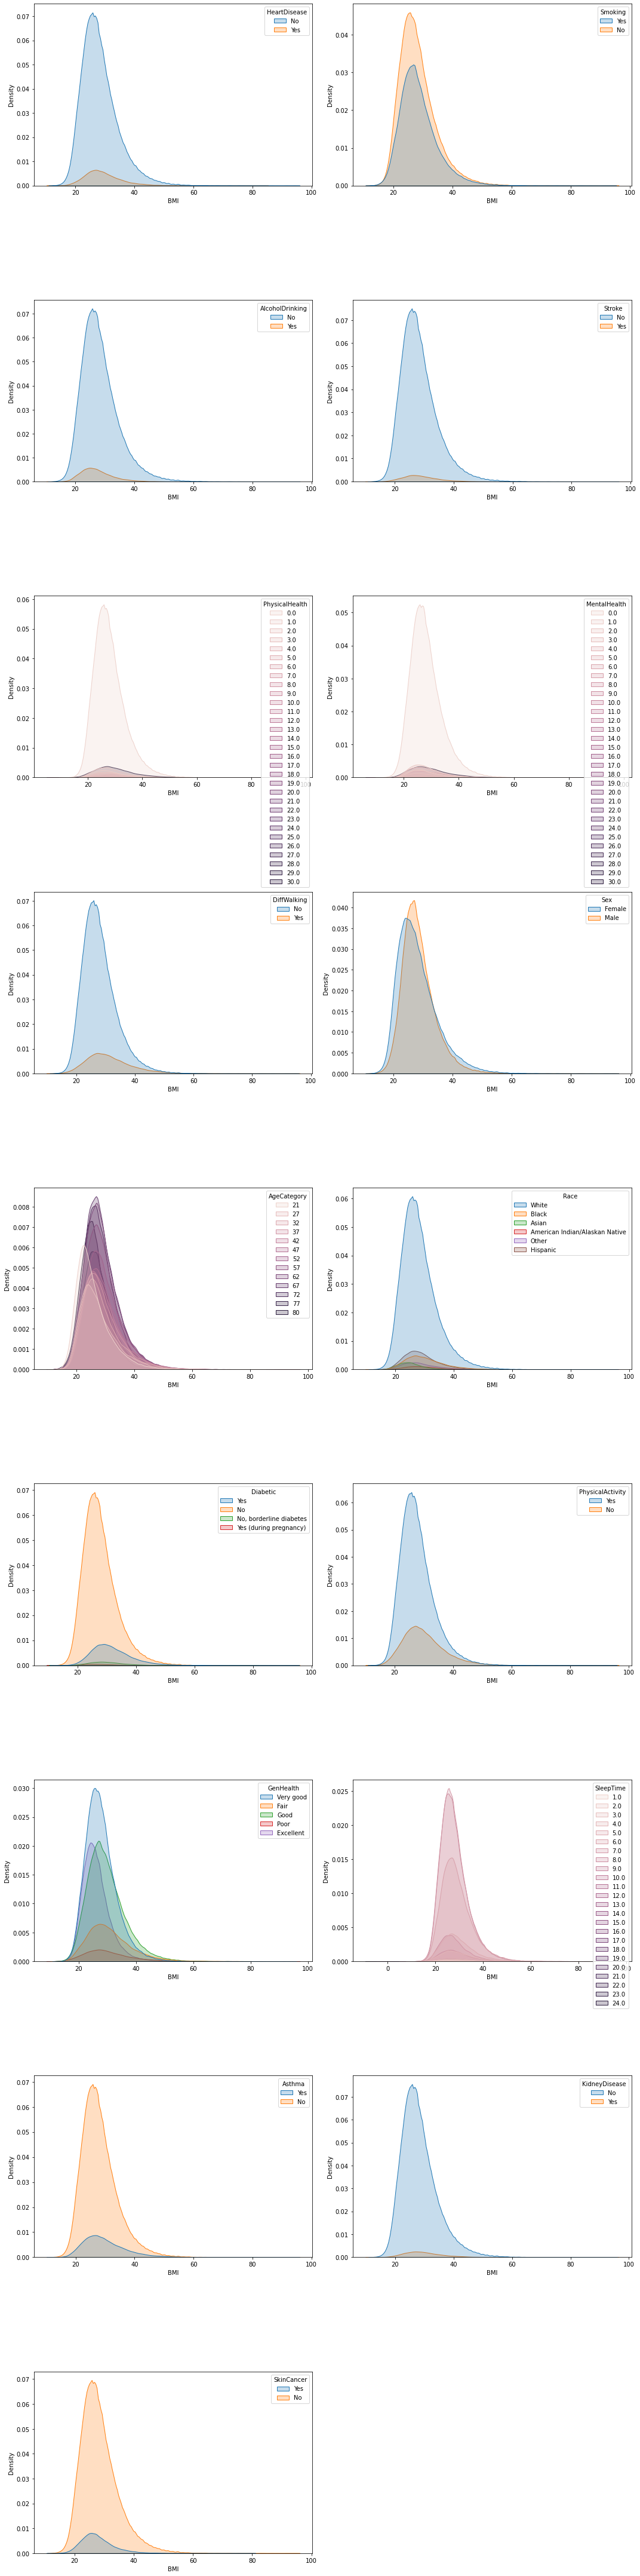

In [83]:
nrows, ncols = 9, 2
fig = plt.figure(figsize=(15,60))
for position , name_feature in zip(range(1,18),combine_feat):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax = axes, data = df, x = continuous_feat[0], hue = name_feature, fill = True, bw_adjust = .8)
    
fig.tight_layout()
plt.show()

## Handle Categorical Data

In [106]:
def plot_bar_chart(df1, df2, maintitle="Main title", title1='Before Normialization',title2='After Normialization'):
    fig,axes = plt.subplots(1,2,figsize=(15,8))

    axes[0].barh(df1.index, df1.values)
    axes[0].set_title(title1)
    axes[0].invert_yaxis()
    
    axes[1].barh(df2.index,df2.values)
    axes[1].set_title(title2)
    axes[1].invert_yaxis()
    
    fig.suptitle(maintitle, fontsize=15)
    
    fig.tight_layout()
    plt.show()

In [107]:
# Define 2 array contain features are categorical type(include Heart Disease feature) and numeric type
cat_features = []
num_features = []
for column, i in zip(df.columns, df.dtypes):
    if i == object:
        cat_features.append(column)
    else:
        num_features.append(column)

In [109]:
num_features

['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']

In [111]:
df_cat = df[cat_features].copy()

In [112]:
df_cat

HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0                No     Yes              No     No          No  Female   
1                No      No              No    Yes          No  Female   
2                No     Yes              No     No          No    Male   
3                No      No              No     No          No  Female   
4                No      No              No     No         Yes  Female   
...             ...     ...             ...    ...         ...     ...   
319790          Yes     Yes              No     No         Yes    Male   
319791           No     Yes              No     No          No    Male   
319792           No      No              No     No          No  Female   
319793           No      No              No     No          No  Female   
319794           No      No              No     No          No  Female   

            Race Diabetic PhysicalActivity  GenHealth Asthma KidneyDisease  \
0          White      Yes              Yes  Very good    Yes            No   
1          White       No              Yes  Very good     No            No   
2          White      Yes              Yes       Fair    Yes            No   
3          White       No               No       Good     No            No   
4          White       No              Yes  Very good     No            No   
...          ...      ...              ...        ...    ...           ...   
319790  Hispanic      Yes               No       Fair    Yes            No   
319791  Hispanic       No              Yes  Very good    Yes            No   
319792  Hispanic       No              Yes       Good     No            No   
319793  Hispanic       No               No       Good     No            No   
319794  Hispanic       No              Yes       Good     No            No   

       SkinCancer  
0             Yes  
1              No  
2              No  
3             Yes  
4              No  
...           ...  
319790         No  
319791         No  
319792         No  
319793         No  
319794         No  

[319795 rows x 13 columns]

## Ordinal Encoder

In [113]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns = cat_features)

In [114]:
df_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  float64
 1   Smoking           319795 non-null  float64
 2   AlcoholDrinking   319795 non-null  float64
 3   Stroke            319795 non-null  float64
 4   DiffWalking       319795 non-null  float64
 5   Sex               319795 non-null  float64
 6   Race              319795 non-null  float64
 7   Diabetic          319795 non-null  float64
 8   PhysicalActivity  319795 non-null  float64
 9   GenHealth         319795 non-null  float64
 10  Asthma            319795 non-null  float64
 11  KidneyDisease     319795 non-null  float64
 12  SkinCancer        319795 non-null  float64
dtypes: float64(13)
memory usage: 31.7 MB


In [125]:
df_cat_encoded

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0                0.0      1.0              0.0     0.0          0.0  0.0   
1                0.0      0.0              0.0     1.0          0.0  0.0   
2                0.0      1.0              0.0     0.0          0.0  1.0   
3                0.0      0.0              0.0     0.0          0.0  0.0   
4                0.0      0.0              0.0     0.0          1.0  0.0   
...              ...      ...              ...     ...          ...  ...   
319790           1.0      1.0              0.0     0.0          1.0  1.0   
319791           0.0      1.0              0.0     0.0          0.0  1.0   
319792           0.0      0.0              0.0     0.0          0.0  0.0   
319793           0.0      0.0              0.0     0.0          0.0  0.0   
319794           0.0      0.0              0.0     0.0          0.0  0.0   

        Race  Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  \
0        5.0       2.0               1.0        4.0     1.0            0.0   
1        5.0       0.0               1.0        4.0     0.0            0.0   
2        5.0       2.0               1.0        1.0     1.0            0.0   
3        5.0       0.0               0.0        2.0     0.0            0.0   
4        5.0       0.0               1.0        4.0     0.0            0.0   
...      ...       ...               ...        ...     ...            ...   
319790   3.0       2.0               0.0        1.0     1.0            0.0   
319791   3.0       0.0               1.0        4.0     1.0            0.0   
319792   3.0       0.0               1.0        2.0     0.0            0.0   
319793   3.0       0.0               0.0        2.0     0.0            0.0   
319794   3.0       0.0               1.0        2.0     0.0            0.0   

        SkinCancer  
0              1.0  
1              0.0  
2              0.0  
3              1.0  
4              0.0  
...            ...  
319790         0.0  
319791         0.0  
319792         0.0  
319793         0.0  
319794         0.0  

[319795 rows x 13 columns]

_We need to check the unique value after transformation, as below all categorical data, Yes and No are convert to 0 and 1._

In [126]:
for feature in df_cat_encoded.columns:
    print(feature)
    print(df_cat_encoded[feature].unique(),"\n")

HeartDisease
[0. 1.] 

Smoking
[1. 0.] 

AlcoholDrinking
[0. 1.] 

Stroke
[0. 1.] 

DiffWalking
[0. 1.] 

Sex
[0. 1.] 

Race
[5. 2. 1. 0. 4. 3.] 

Diabetic
[2. 0. 1. 3.] 

PhysicalActivity
[1. 0.] 

GenHealth
[4. 1. 2. 3. 0.] 

Asthma
[1. 0.] 

KidneyDisease
[0. 1.] 

SkinCancer
[1. 0.] 



*The OrdinalEncoder does a good job at convert categorical to numeric especially the order. As you can see the unique value of each categorical features not have the order.*

Next step, wer merge new dataframe with numeric feature to create new numeric dataframe

In [127]:
df_numeric = pd.merge(df_cat_encoded, df[num_features],left_index = True, right_index = True)

In [128]:
df_numeric.head()

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  Race  \
0           0.0      1.0              0.0     0.0          0.0  0.0   5.0   
1           0.0      0.0              0.0     1.0          0.0  0.0   5.0   
2           0.0      1.0              0.0     0.0          0.0  1.0   5.0   
3           0.0      0.0              0.0     0.0          0.0  0.0   5.0   
4           0.0      0.0              0.0     0.0          1.0  0.0   5.0   

   Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer  \
0       2.0               1.0        4.0     1.0            0.0         1.0   
1       0.0               1.0        4.0     0.0            0.0         0.0   
2       2.0               1.0        1.0     1.0            0.0         0.0   
3       0.0               0.0        2.0     0.0            0.0         1.0   
4       0.0               1.0        4.0     0.0            0.0         0.0   

     BMI  PhysicalHealth  MentalHealth  AgeCategory  SleepTime  
0  16.60             3.0          30.0           57        5.0  
1  20.34             0.0           0.0           80        7.0  
2  26.58            20.0          30.0           67        8.0  
3  24.21             0.0           0.0           77        6.0  
4  23.71            28.0           0.0           42        8.0

## Correlation Matrix

In [130]:
corr_matrix = df_numeric.corr()
corr_matrix

HeartDisease   Smoking  AlcoholDrinking    Stroke  \
HeartDisease          1.000000  0.107764        -0.032080  0.196835   
Smoking               0.107764  1.000000         0.111768  0.061226   
AlcoholDrinking      -0.032080  0.111768         1.000000 -0.019858   
Stroke                0.196835  0.061226        -0.019858  1.000000   
DiffWalking           0.201258  0.120074        -0.035328  0.174143   
Sex                   0.070040  0.085052         0.004200 -0.003091   
Race                  0.034854  0.065499         0.036702 -0.003956   
Diabetic              0.168553  0.053847        -0.057372  0.101518   
PhysicalActivity     -0.100030 -0.097174         0.017487 -0.079455   
GenHealth            -0.011062  0.020625         0.001629 -0.009335   
Asthma                0.041444  0.024149        -0.002202  0.038866   
KidneyDisease         0.145197  0.034920        -0.028280  0.091167   
SkinCancer            0.093317  0.033977        -0.005702  0.048116   
BMI                   0.051803  0.023118        -0.038816  0.019733   
PhysicalHealth        0.170721  0.115352        -0.017254  0.137014   
MentalHealth          0.028591  0.085157         0.051282  0.046467   
AgeCategory           0.231583  0.130612        -0.058587  0.136738   
SleepTime             0.008327 -0.030336        -0.005065  0.011900   

                  DiffWalking       Sex      Race  Diabetic  PhysicalActivity  \
HeartDisease         0.201258  0.070040  0.034854  0.168553         -0.100030   
Smoking              0.120074  0.085052  0.065499  0.053847         -0.097174   
AlcoholDrinking     -0.035328  0.004200  0.036702 -0.057372          0.017487   
Stroke               0.174143 -0.003091 -0.003956  0.101518         -0.079455   
DiffWalking          1.000000 -0.068860 -0.015831  0.205502         -0.278524   
Sex                 -0.068860  1.000000  0.018855 -0.013456          0.048247   
Race                -0.015831  0.018855  1.000000 -0.052216          0.056767   
Diabetic             0.205502 -0.013456 -0.052216  1.000000         -0.133824   
PhysicalActivity    -0.278524  0.048247  0.056767 -0.133824          1.000000   
GenHealth           -0.043552 -0.010283  0.050344 -0.010854          0.024418   
Asthma               0.103222 -0.069191 -0.017975  0.049827         -0.041526   
KidneyDisease        0.153064 -0.009084  0.003709  0.142917         -0.081827   
SkinCancer           0.064840  0.013434  0.134780  0.032523         -0.001328   
BMI                  0.181678  0.026940 -0.037424  0.202472         -0.150616   
PhysicalHealth       0.428373 -0.040904 -0.000847  0.151361         -0.232283   
MentalHealth         0.152235 -0.100058 -0.014491  0.032945         -0.095808   
AgeCategory          0.241328 -0.067001  0.162874  0.194918         -0.120369   
SleepTime           -0.022216 -0.015704  0.035889  0.000449          0.003849   

                  GenHealth    Asthma  KidneyDisease  SkinCancer       BMI  \
HeartDisease      -0.011062  0.041444       0.145197    0.093317  0.051803   
Smoking            0.020625  0.024149       0.034920    0.033977  0.023118   
AlcoholDrinking    0.001629 -0.002202      -0.028280   -0.005702 -0.038816   
Stroke            -0.009335  0.038866       0.091167    0.048116  0.019733   
DiffWalking       -0.043552  0.103222       0.153064    0.064840  0.181678   
Sex               -0.010283 -0.069191      -0.009084    0.013434  0.026940   
Race               0.050344 -0.017975       0.003709    0.134780 -0.037424   
Diabetic          -0.010854  0.049827       0.142917    0.032523  0.202472   
PhysicalActivity   0.024418 -0.041526      -0.081827   -0.001328 -0.150616   
GenHealth          1.000000  0.007280      -0.010580    0.018982  0.035932   
Asthma             0.007280  1.000000       0.039707   -0.000396  0.092345   
KidneyDisease     -0.010580  0.039707       1.000000    0.061816  0.050768   
SkinCancer         0.018982 -0.000396       0.061816    1.000000 -0.033644   
BMI                0.035932  0.09234

The correlation matrix hard to understand, so we draw heat map to easy intepret. The higher correlation, the brighter cell.

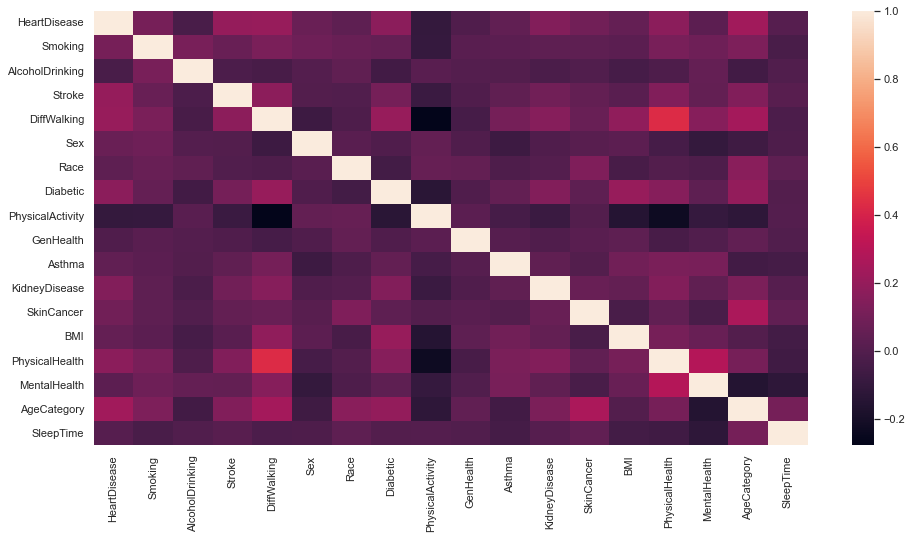

In [131]:
sns.heatmap(corr_matrix)
plt.show()

However, we want to only look at the Heart Disease to see which feature most correlated to Heart Disease, so we take Heart Disease in correlation matrix and sort by descending

In [132]:
corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

AgeCategory         0.231583
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

**We see AgeCategory, DiffWalking, Stroke, PhysicalHealth and Diabetic have fair correlation with HeartDiease but we not make sure these should be keep in training so we compare the covariance and see these features are tend to have same behavior with Heart Disease or inverse.**

## Covariance

In [134]:
cov_matrix = df_numeric.cov()
cov_matrix

HeartDisease   Smoking  AlcoholDrinking    Stroke  \
HeartDisease          0.078269  0.014842        -0.002261  0.010494   
Smoking               0.014842  0.242340         0.013860  0.005744   
AlcoholDrinking      -0.002261  0.013860         0.063460 -0.000953   
Stroke                0.010494  0.005744        -0.000953  0.036316   
DiffWalking           0.019471  0.020441        -0.003078  0.011476   
Sex                   0.009786  0.020909         0.000528 -0.000294   
Race                  0.011820  0.039086         0.011208 -0.000914   
Diabetic              0.033786  0.018992        -0.010355  0.013861   
PhysicalActivity     -0.011679 -0.019964         0.001838 -0.006319   
GenHealth            -0.004749  0.015582         0.000630 -0.002730   
Asthma                0.003951  0.004050        -0.000189  0.002524   
KidneyDisease         0.007651  0.003238        -0.001342  0.003272   
SkinCancer            0.007591  0.004864        -0.000418  0.002666   
BMI                   0.092118  0.072336        -0.062152  0.023902   
PhysicalHealth        0.379748  0.451495        -0.034559  0.207599   
MentalHealth          0.063632  0.333494         0.102770  0.070444   
AgeCategory           1.148092  1.139385        -0.261532  0.461755   
SleepTime             0.003345 -0.021445        -0.001832  0.003256   

                  DiffWalking       Sex      Race  Diabetic  PhysicalActivity  \
HeartDisease         0.019471  0.009786  0.011820  0.033786         -0.011679   
Smoking              0.020441  0.020909  0.039086  0.018992         -0.019964   
AlcoholDrinking     -0.003078  0.000528  0.011208 -0.010355          0.001838   
Stroke               0.011476 -0.000294 -0.000914  0.013861         -0.006319   
DiffWalking          0.119586 -0.011892 -0.006636  0.050917         -0.040197   
Sex                 -0.011892  0.249389  0.011414 -0.004815          0.010055   
Race                -0.006636  0.011414  1.469449 -0.045350          0.028719   
Diabetic             0.050917 -0.004815 -0.045350  0.513344         -0.040016   
PhysicalActivity    -0.040197  0.010055  0.028719 -0.040016          0.174176   
GenHealth           -0.023113 -0.007881  0.093656 -0.011934          0.015639   
Asthma               0.012162 -0.011773 -0.007424  0.012164         -0.005905   
KidneyDisease        0.009970 -0.000854  0.000847  0.019287         -0.006432   
SkinCancer           0.006520  0.001951  0.047507  0.006776         -0.000161   
BMI                  0.399331  0.085511 -0.288351  0.922063         -0.399536   
PhysicalHealth       1.177809 -0.162411 -0.008168  0.862248         -0.770771   
MentalHealth         0.418799 -0.397508 -0.139740  0.187778         -0.318090   
AgeCategory          1.478839 -0.592916  3.498676  2.474743         -0.890189   
SleepTime           -0.011032 -0.011262  0.062473  0.000462          0.002307   

                  GenHealth    Asthma  KidneyDisease  SkinCancer        BMI  \
HeartDisease      -0.004749  0.003951       0.007651    0.007591   0.092118   
Smoking            0.015582  0.004050       0.003238    0.004864   0.072336   
AlcoholDrinking    0.000630 -0.000189      -0.001342   -0.000418  -0.062152   
Stroke            -0.002730  0.002524       0.003272    0.002666   0.023902   
DiffWalking       -0.023113  0.012162       0.009970    0.006520   0.399331   
Sex               -0.007881 -0.011773      -0.000854    0.001951   0.085511   
Race               0.093656 -0.007424       0.000847    0.047507  -0.288351   
Diabetic          -0.011934  0.012164       0.019287    0.006776   0.922063   
PhysicalActivity   0.015639 -0.005905      -0.006432   -0.000161  -0.399536   
GenHealth          2.355143  0.003807      -0.003058    0.008471   0.350497   
Asthma             0.003807  0.116089       0.002548   -0.000039   0.199986   
KidneyDisease     -0.003058  0.002548       0.035476    0.003386   0.060778   
SkinCancer         0.008471 -0.000039       0.003386    0.084550  -0.062180   
BMI                0.3

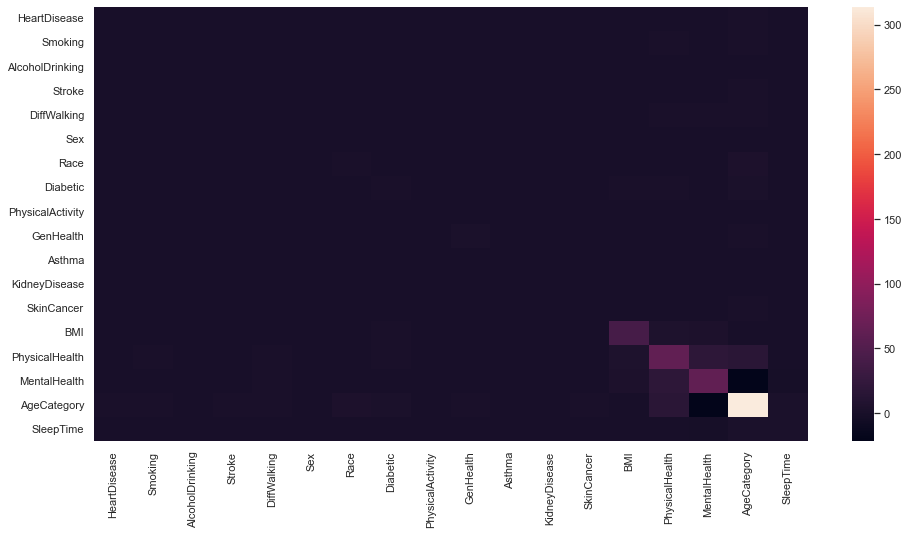

In [135]:
sns.heatmap(cov_matrix)
plt.show()

In [136]:
cov_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

AgeCategory         1.148092
PhysicalHealth      0.379748
BMI                 0.092118
MentalHealth        0.063632
Diabetic            0.033786
DiffWalking         0.019471
Smoking             0.014842
Race                0.011820
Stroke              0.010494
Sex                 0.009786
KidneyDisease       0.007651
SkinCancer          0.007591
Asthma              0.003951
SleepTime           0.003345
AlcoholDrinking    -0.002261
GenHealth          -0.004749
PhysicalActivity   -0.011679
Name: HeartDisease, dtype: float64

_We hardly compare features between correlation and covariance when just look at the Series. So we plot it with bar plot, we drop Heart Disease before plotting. You can see the problem here, the range of axis is (0,0.2) instead (0,1), that's because the maximum correlation is 0.2 (Quite small) but keeping range (0,0.2) easy to interpret other features than (0,1)_

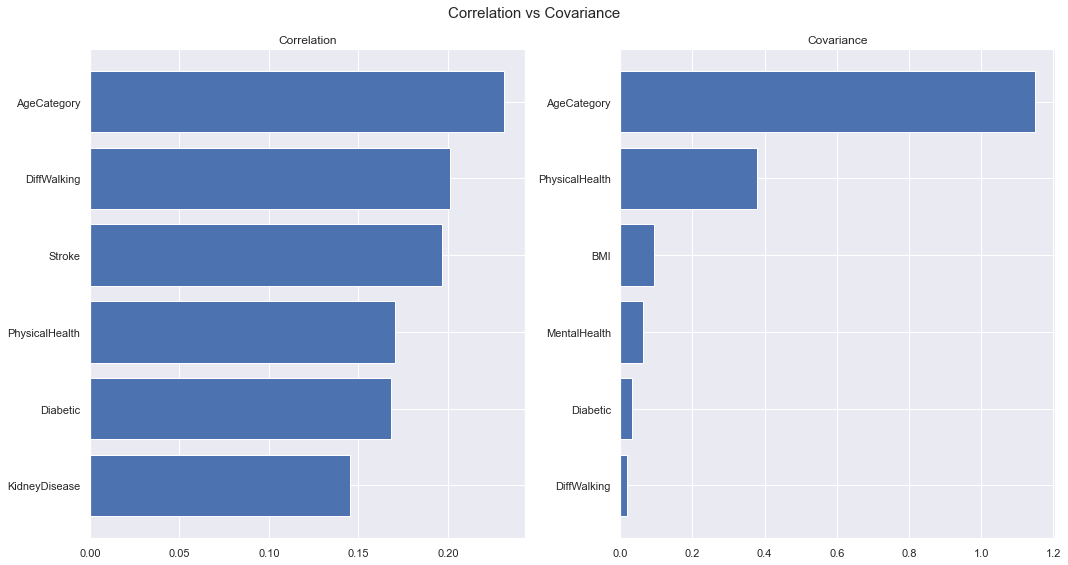

In [137]:
unscaling_cor = corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]
unscaling_cov = cov_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]

plot_bar_chart(unscaling_cor,unscaling_cov,maintitle = "Correlation vs Covariance", title1="Correlation",title2="Covariance")

_In the top 5 of highest covariances (exclude Heart Diease), we see BMI is the top 3 but the correlation in top 10, the similar with MentalHealth and Stroke. Meanwhile,PhysicalHealth, AgeCategory, Diabetic, DiffWalking are still in top 6 in both correlation and covariances, especially AgeCategory in top 2 both cases. So we can conclude the AgeCategory has the most affect to Heart Disease.
Our question that does the Physical Health better than AgeCategory despite it has top 4 correlation but has most high covariance than the other (Only it have covariance above 0.3)?
Maybe it because we not normalize original numeric features (BMI, PhysicalHealth, MentalHealth, SleepTime). Therefore, our next step is normialization which our method is scaling standardization the data by **StandardScaler** library._

## Handle Numeric Data

### *Standardization*

In [138]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()


In [139]:
df_numeric = df[num_features].copy()

In [141]:
df_num_scaler = stand_scaler.fit_transform(df_numeric)
df_num_scaler = pd.DataFrame(df_num_scaler,columns= num_features)

In [142]:
df_num_scaler

BMI  PhysicalHealth  MentalHealth  AgeCategory  SleepTime
0      -1.844750       -0.046751      3.281069     0.149220  -1.460354
1      -1.256338       -0.424070     -0.490039     1.447159  -0.067601
2      -0.274603        2.091388      3.281069     0.713541   0.628776
3      -0.647473       -0.424070     -0.490039     1.277863  -0.763977
4      -0.726138        3.097572     -0.490039    -0.697262   0.628776
...          ...             ...           ...          ...        ...
319790 -0.144019        0.456341     -0.490039     0.431381  -0.763977
319791  0.238291       -0.424070     -0.490039    -0.979422  -1.460354
319792 -0.642753       -0.424070     -0.490039    -0.415101  -0.763977
319793  0.705560       -0.424070     -0.490039    -1.543744   3.414282
319794  2.868839       -0.424070     -0.490039     1.447159   0.628776

[319795 rows x 5 columns]

In [143]:
df_numeric_scaler = pd.merge(df_cat_encoded, df_num_scaler, left_index = True, right_index= True)

In [144]:
df_numeric_scaler.head()

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  Race  \
0           0.0      1.0              0.0     0.0          0.0  0.0   5.0   
1           0.0      0.0              0.0     1.0          0.0  0.0   5.0   
2           0.0      1.0              0.0     0.0          0.0  1.0   5.0   
3           0.0      0.0              0.0     0.0          0.0  0.0   5.0   
4           0.0      0.0              0.0     0.0          1.0  0.0   5.0   

   Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer  \
0       2.0               1.0        4.0     1.0            0.0         1.0   
1       0.0               1.0        4.0     0.0            0.0         0.0   
2       2.0               1.0        1.0     1.0            0.0         0.0   
3       0.0               0.0        2.0     0.0            0.0         1.0   
4       0.0               1.0        4.0     0.0            0.0         0.0   

        BMI  PhysicalHealth  MentalHealth  AgeCategory  SleepTime  
0 -1.844750       -0.046751      3.281069     0.149220  -1.460354  
1 -1.256338       -0.424070     -0.490039     1.447159  -0.067601  
2 -0.274603        2.091388      3.281069     0.713541   0.628776  
3 -0.647473       -0.424070     -0.490039     1.277863  -0.763977  
4 -0.726138        3.097572     -0.490039    -0.697262   0.628776

In [146]:
df_numeric_scaler.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.231583
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

In [148]:
df_numeric_scaler.cov()["HeartDisease"].sort_values(ascending=False)

HeartDisease        0.078269
AgeCategory         0.064789
PhysicalHealth      0.047762
Diabetic            0.033786
DiffWalking         0.019471
Smoking             0.014842
BMI                 0.014493
Race                0.011820
Stroke              0.010494
Sex                 0.009786
MentalHealth        0.007999
KidneyDisease       0.007651
SkinCancer          0.007591
Asthma              0.003951
SleepTime           0.002330
AlcoholDrinking    -0.002261
GenHealth          -0.004749
PhysicalActivity   -0.011679
Name: HeartDisease, dtype: float64

In [149]:
scaling_cor = df_numeric_scaler.corr()["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]

scaling_cov = df_numeric_scaler.cov()["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]

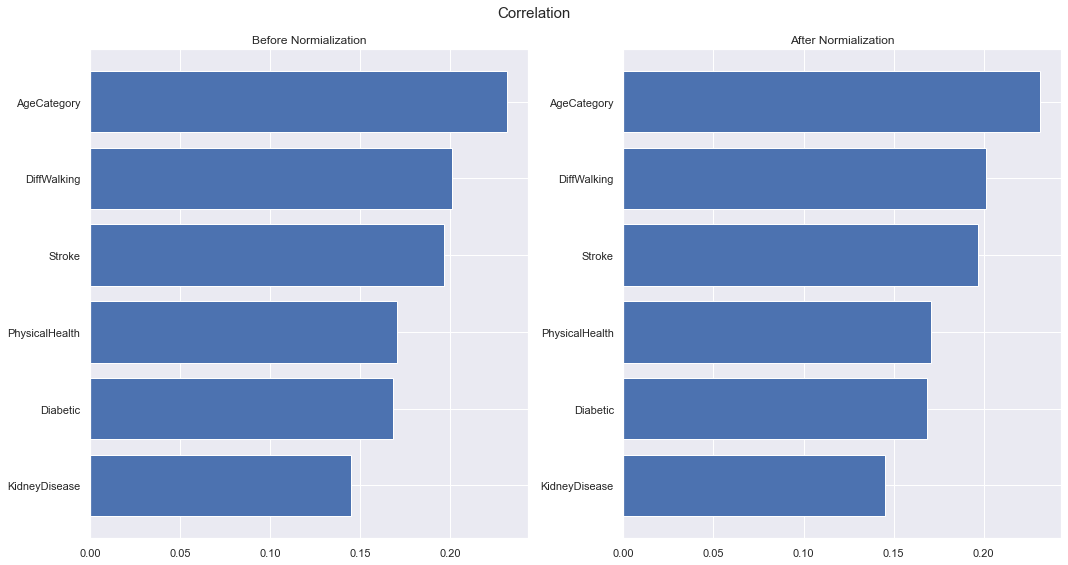

In [150]:
plot_bar_chart(unscaling_cor,scaling_cor, maintitle="Correlation")

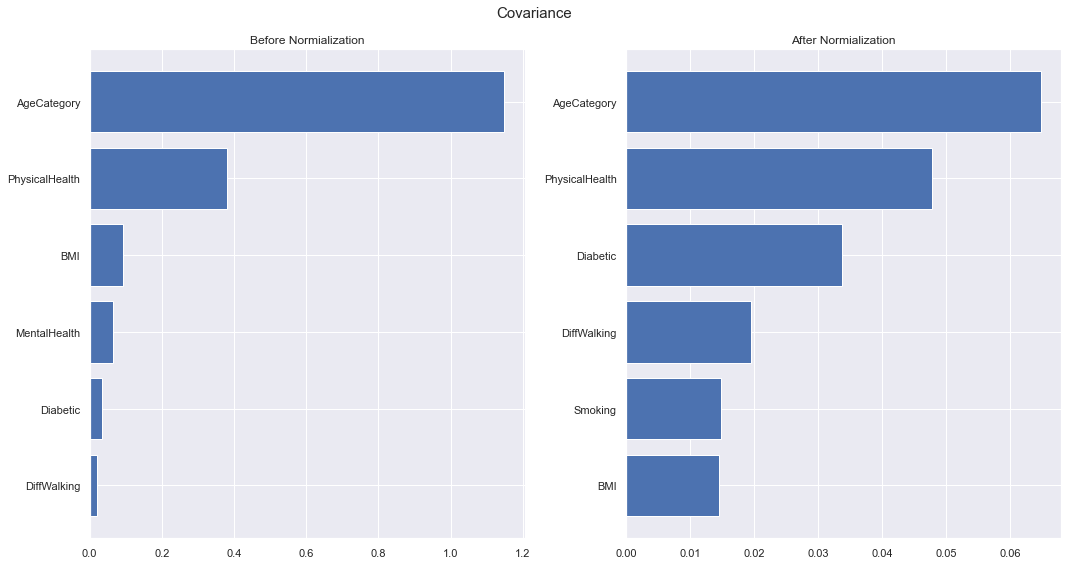

In [151]:
plot_bar_chart(unscaling_cov,scaling_cov,maintitle="Covariance")

The result in correlation not different after normalization and also manages in covariance. The Physical health gained from 0.170721 to 0.047762 which is quite good. Meanwhile Diabetic and DiffWalking are increasing from top 5,6 to 3,4. </br>From these information we can conclude features that most related to Heart Disease are: AgeCategory, Physical Health, Diabetic, DiffWalking. However, let look back to the pie charts in Binary data, we conclude in that chapter is Stroke, DiffWalking, Physical Activity, Kidney Disease, Skin Cancer affect most people in Heart Disease than people don't have Heart Disease. However, while Stroke and DiffWalking and Kidney Disease in top 6 correlation with Heart Disease, the other two have very low correlation, especially Physical Activity have negative correlation and covariance after normialization, Skin Cancer has covariance close to zero. We can add Kidney Disease and Skin Cancer into important features but we not sure about Physical Activity and Skin Cancer despite of most people have Heart Disease don't do Physical Activity and Skin Cancer than people who don't have Heart Disease.

</br>In our conclusion, we have these important features: AgeCategory, Physical Health, Diabetic, DiffWalking, Stroke and Kidney Disease. As for, Physical Activity and Skin Cancer we can add into training data to see if it improve the accuracy or not.

## Scatter Plot


In [156]:
# We want to create new dataframe that already scale and convert categorical to numeric
df_new = df_numeric_scaler.copy()

In [158]:
df_new.head()

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  Race  \
0           0.0      1.0              0.0     0.0          0.0  0.0   5.0   
1           0.0      0.0              0.0     1.0          0.0  0.0   5.0   
2           0.0      1.0              0.0     0.0          0.0  1.0   5.0   
3           0.0      0.0              0.0     0.0          0.0  0.0   5.0   
4           0.0      0.0              0.0     0.0          1.0  0.0   5.0   

   Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer  \
0       2.0               1.0        4.0     1.0            0.0         1.0   
1       0.0               1.0        4.0     0.0            0.0         0.0   
2       2.0               1.0        1.0     1.0            0.0         0.0   
3       0.0               0.0        2.0     0.0            0.0         1.0   
4       0.0               1.0        4.0     0.0            0.0         0.0   

        BMI  PhysicalHealth  MentalHealth  AgeCategory  SleepTime  
0 -1.844750       -0.046751      3.281069     0.149220  -1.460354  
1 -1.256338       -0.424070     -0.490039     1.447159  -0.067601  
2 -0.274603        2.091388      3.281069     0.713541   0.628776  
3 -0.647473       -0.424070     -0.490039     1.277863  -0.763977  
4 -0.726138        3.097572     -0.490039    -0.697262   0.628776

In [159]:
df_new.describe()

HeartDisease        Smoking  AlcoholDrinking         Stroke  \
count  319795.000000  319795.000000    319795.000000  319795.000000   
mean        0.085595       0.412477         0.068097       0.037740   
std         0.279766       0.492281         0.251912       0.190567   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.000000       0.000000         0.000000       0.000000   
50%         0.000000       0.000000         0.000000       0.000000   
75%         0.000000       1.000000         0.000000       0.000000   
max         1.000000       1.000000         1.000000       1.000000   

         DiffWalking            Sex           Race       Diabetic  \
count  319795.000000  319795.000000  319795.000000  319795.000000   
mean        0.138870       0.475273       4.396742       0.300386   
std         0.345812       0.499389       1.212208       0.716480   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       5.000000       0.000000   
50%         0.000000       0.000000       5.000000       0.000000   
75%         0.000000       1.000000       5.000000       0.000000   
max         1.000000       1.000000       5.000000       3.000000   

       PhysicalActivity      GenHealth         Asthma  KidneyDisease  \
count     319795.000000  319795.000000  319795.000000  319795.000000   
mean           0.775362       2.220904       0.134061       0.036833   
std            0.417344       1.534647       0.340718       0.188352   
min            0.000000       0.000000       0.000000       0.000000   
25%            1.000000       1.000000       0.000000       0.000000   
50%            1.000000       2.000000       0.000000       0.000000   
75%            1.000000       4.000000       0.000000       0.000000   
max            1.000000       4.000000       1.000000       1.000000   

          SkinCancer           BMI  PhysicalHealth  MentalHealth  \
count  319795.000000  3.197950e+05    3.197950e+05  3.197950e+05   
mean        0.093244  7.247738e-16    5.814632e-17 -4.332645e-17   
std         0.290775  1.000002e+00    1.000002e+00  1.000002e+00   
min         0.000000 -2.565319e+00   -4.240698e-01 -4.900386e-01   
25%         0.000000 -6.757926e-01   -4.240698e-01 -4.900386e-01   
50%         0.000000 -1.550322e-01   -4.240698e-01 -4.900386e-01   
75%         0.000000  4.868719e-01   -1.725240e-01 -1.129278e-01   
max         1.000000  1.046628e+01    3.349118e+00  3.281069e+00   

        AgeCategory     SleepTime  
count  3.197950e+05  3.197950e+05  
mean  -6.496746e-17  1.727170e-16  
std    1.000002e+00  1.000002e+00  
min   -1.882337e+00 -4.245859e+00  
25%   -6.972618e-01 -7.639770e-01  
50%    1.492201e-01 -6.760053e-02  
75%    7.135414e-01  6.287760e-01  
max    1.447159e+00  1.177080e+01

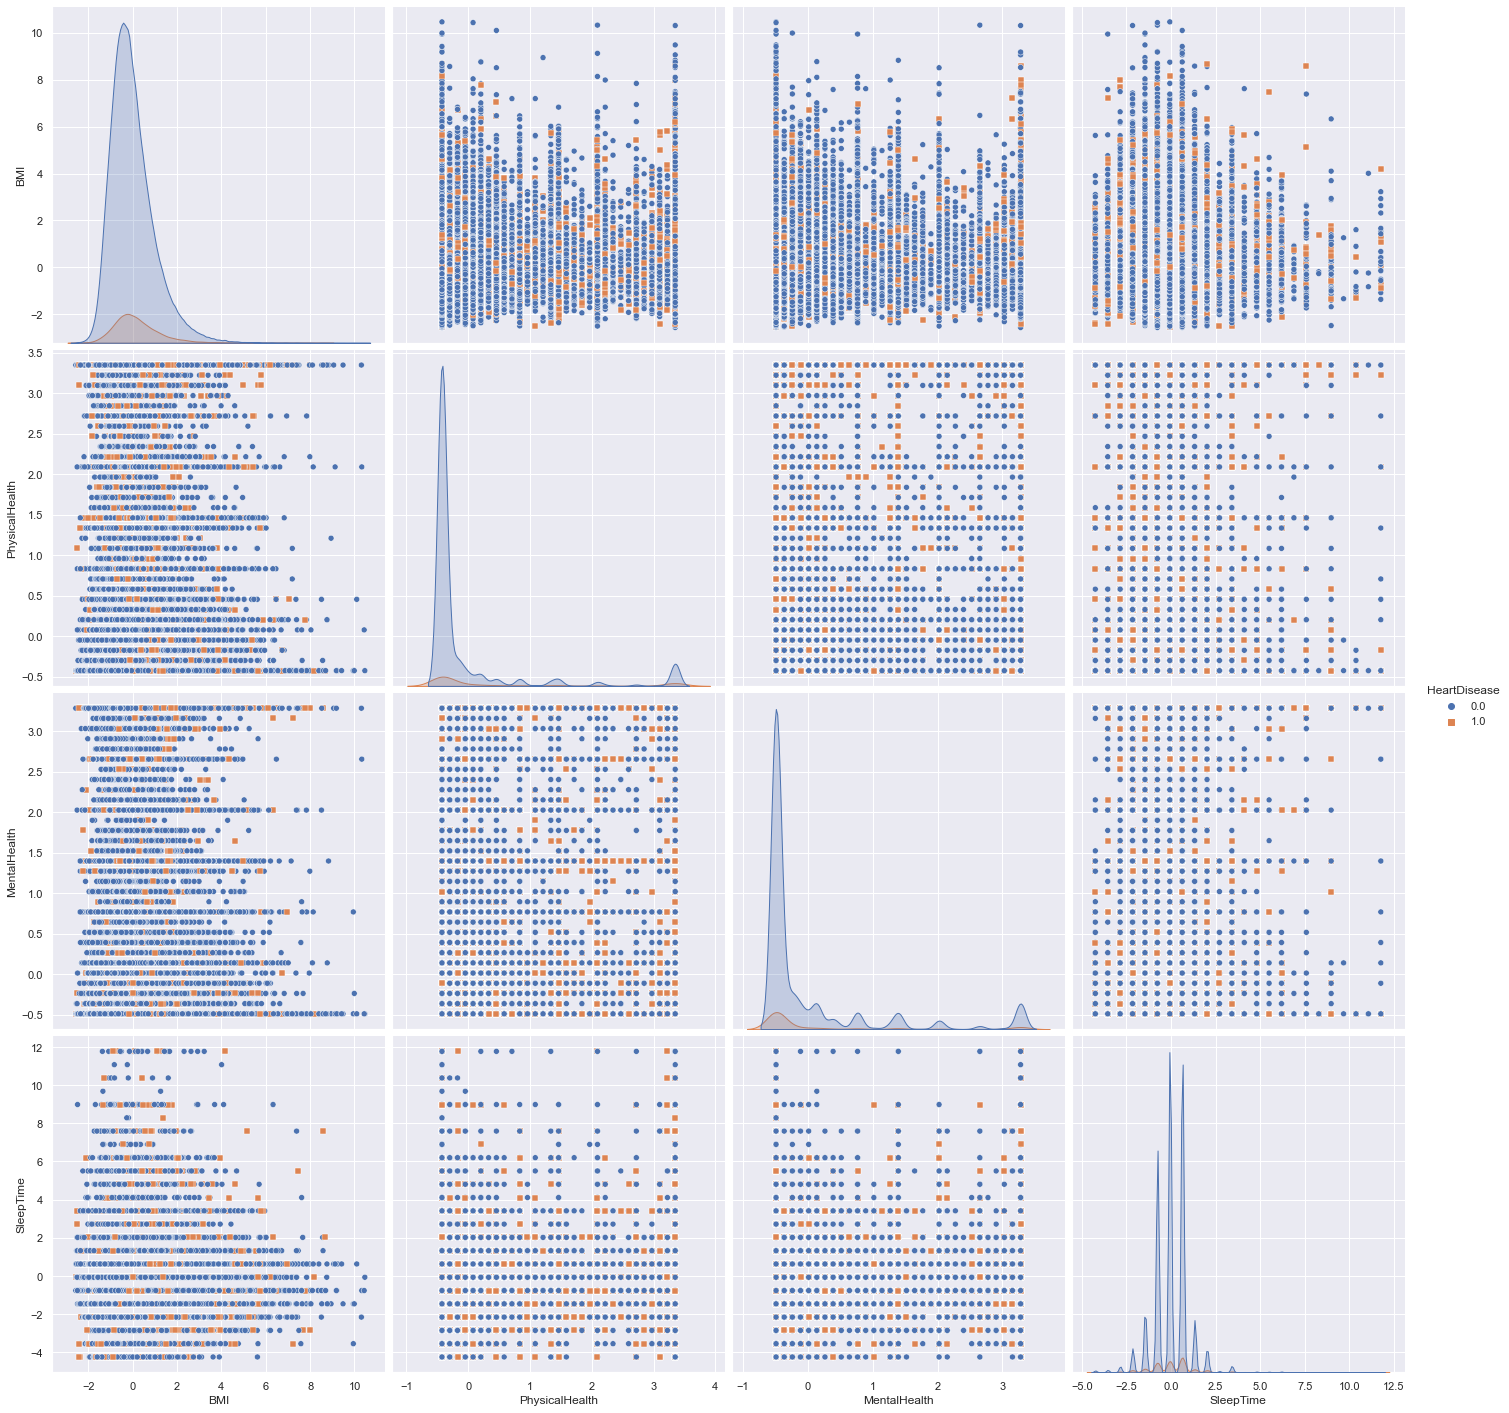

In [160]:
sns.pairplot(df_new[["HeartDisease","BMI","PhysicalHealth", "MentalHealth", "SleepTime"]], hue="HeartDisease", markers=["o", "s"], height=5)
plt.show()

In [162]:
def draw_scatter_3D(feature1, feature2, feature3):
    fig = plt.figure(figsize=(15,8))
    axes = plt.axes(projection='3d')

    axes.scatter3D(df_new[feature1], df_new[feature2], df_new[feature3], c=df_new["HeartDisease"])

    axes.set_xlabel(feature1)
    axes.set_ylabel(feature2)
    axes.set_zlabel(feature3)

    fig.tight_layout()
    plt.show()

We also plot with 3D dimension to clearly see the distributed of Heart Disease. We choose SleepTime, BMI and Physical Health because these less correlated each other.

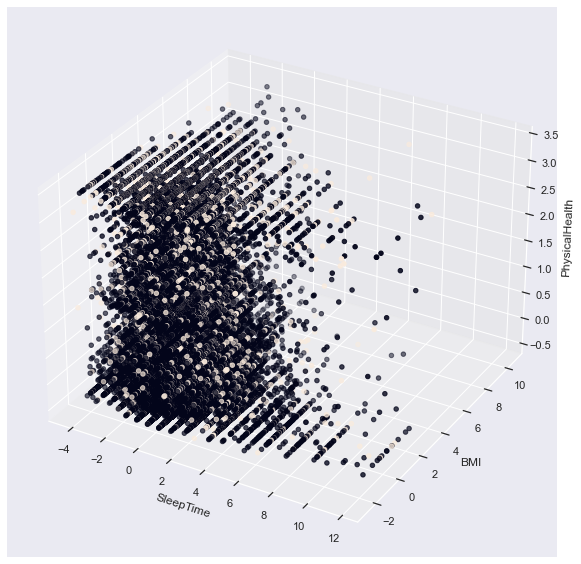

In [163]:
draw_scatter_3D("SleepTime", "BMI", "PhysicalHealth")

## Detect Outliers

For outlier detect, we draw Boxplot instead of Violin plot because while Violin plot show nuances in distribution, Boxplot show clearly outliers in the data. We try draw boxplot with our category important features mention above: **AgeCategory, Diabetic, Diff Walking, Stroke, Kidney Disease**

In [223]:
def box_plot(x_axis):
    i=1
    #plt.figure(figsize=(15,15))
    plt.figure(figsize=(15,15))
    for col in float1:
        plt.subplot(3,2,i)
        
        sns.boxplot(y=df[col], x = df[x_axis])
        
        i+=1

#### Age Category

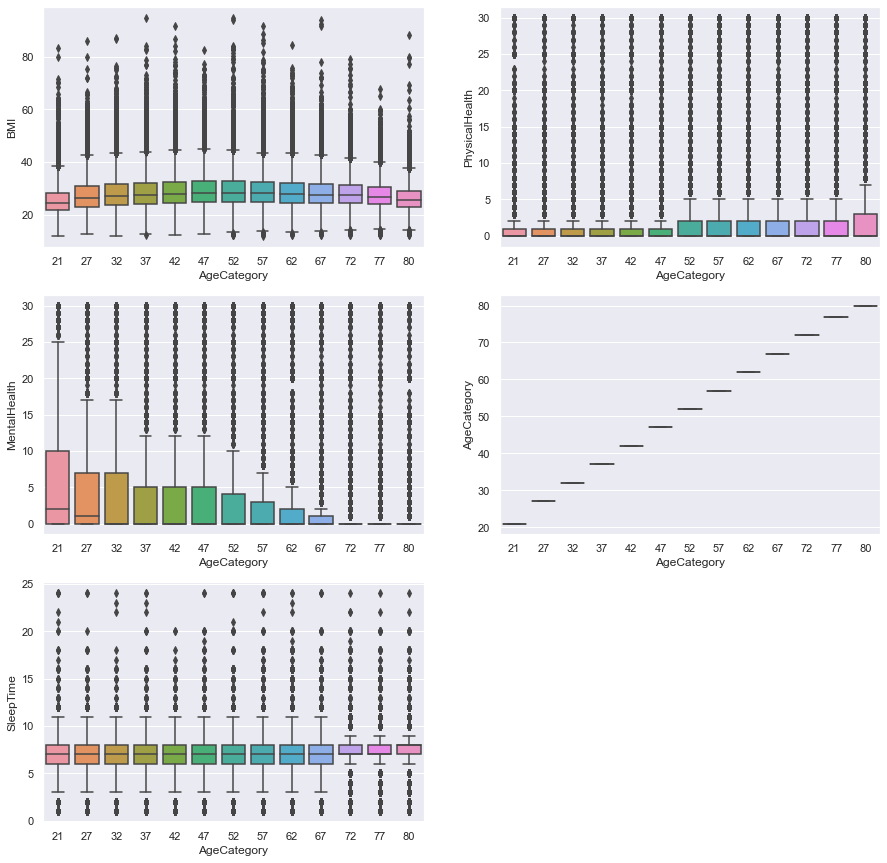

In [225]:

box_plot("AgeCategory")


#### Diabetic

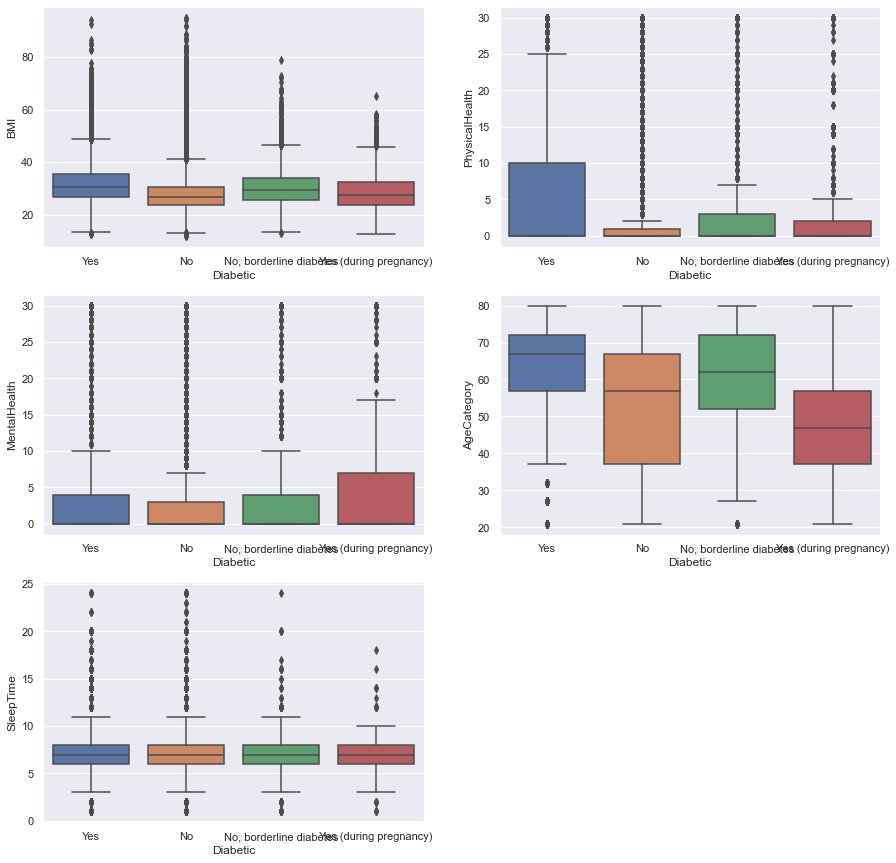

In [189]:
box_plot("Diabetic")


#### Diff Walking

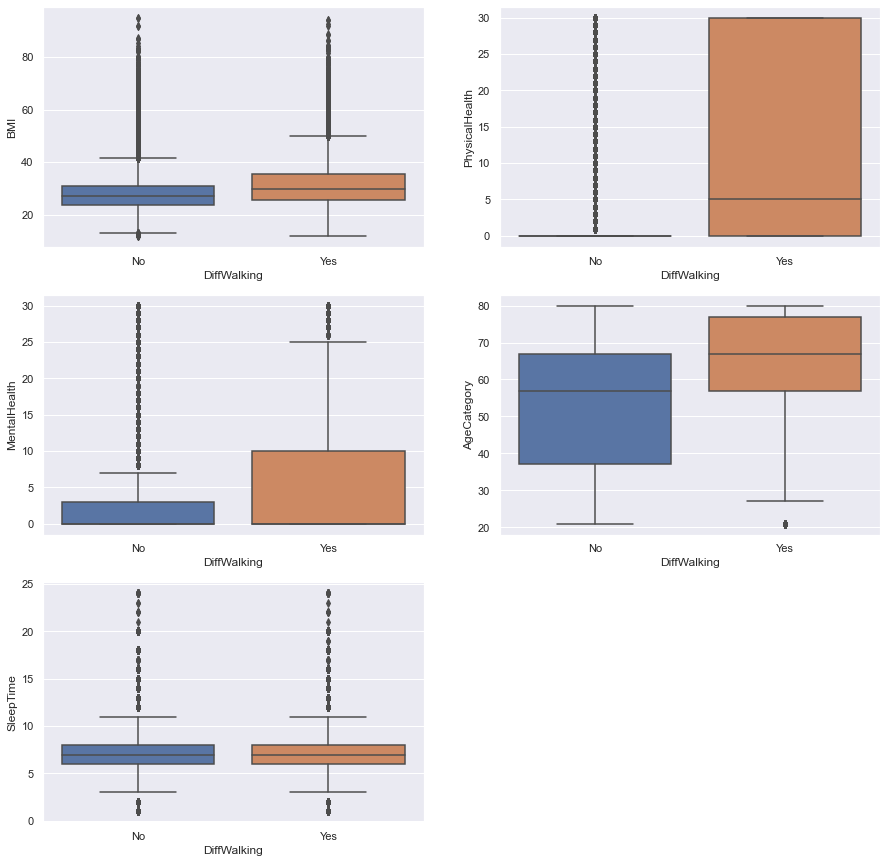

In [232]:
box_plot("DiffWalking")


#### Stroke

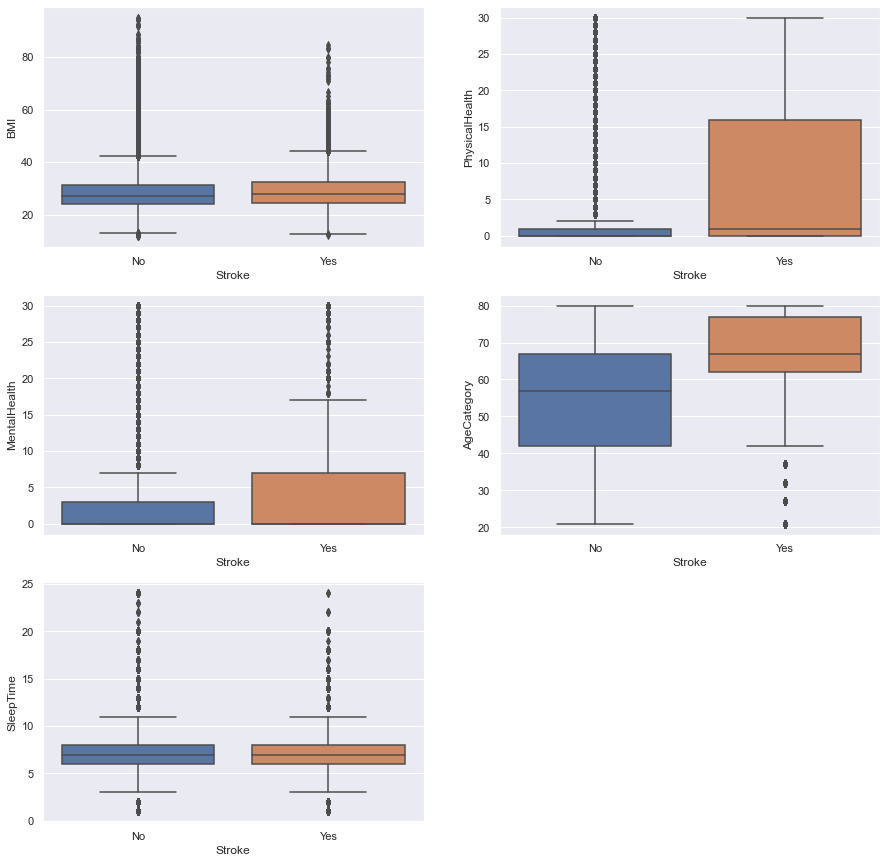

In [190]:
box_plot("Stroke")

#### Kidney Disease

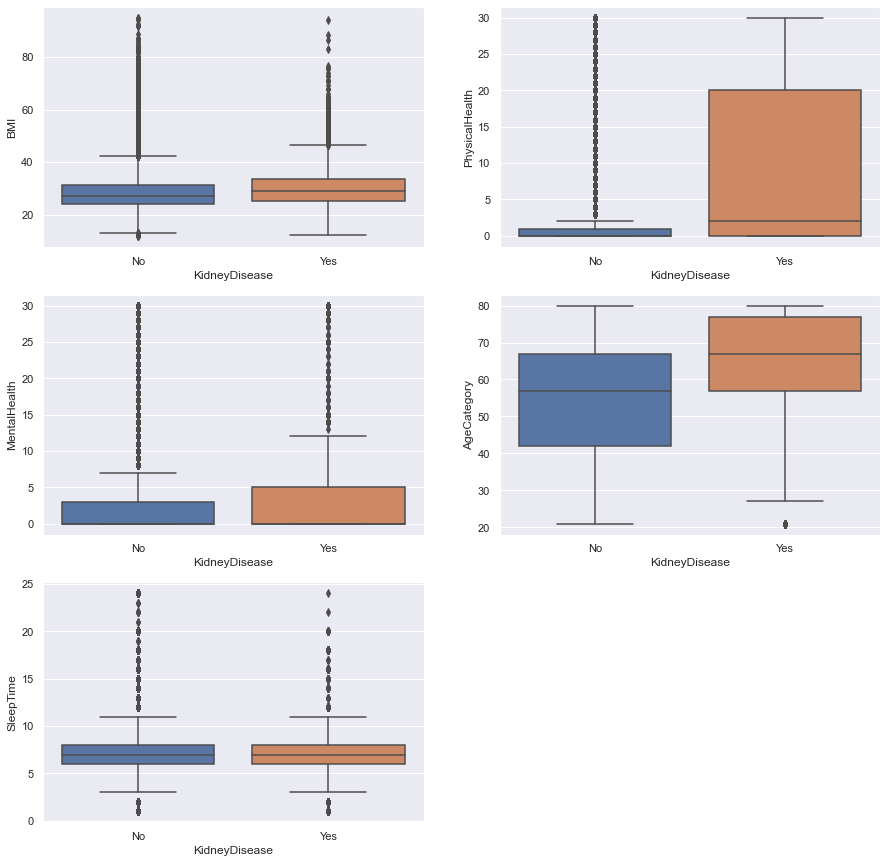

In [233]:
box_plot("KidneyDisease")

## Split Dataset for Training and Testing

In [236]:
# Select Features
features_ = df_new.drop(columns=['HeartDisease'],axis = 1)

# Select Target
target = df_new['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_ , target, test_size = 0.2, random_state = 0)

print("Shape of training feature", X_train.shape)
print("Shape of testing feature", X_test.shape)
print("Shape of training label", y_train.shape)
print("Shape of testing label", y_test.shape)

Shape of training feature (255836, 17)
Shape of testing feature (63959, 17)
Shape of training label (255836,)
Shape of testing label (63959,)


In [ ]:
sns.boxplot()